In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import skimage.io as io
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import gaussian
import skimage.color as sColor
import skimage.transform as trs

import scipy.optimize


In [2]:
cards = io.imread_collection('cards\*.jpg')


In [3]:
blurredImg = []
ratios = []
for img in tqdm(cards):
    temp = trs.resize(img[30:(img.shape[0]-70),30:(img.shape[1]-30)],(512,512))
    blurredImg.append(gaussian(sColor.rgb2grey(temp),sigma=10))
    ratios.append((512/img.shape[0],512/img.shape[1]))
    

100%|████████████████████████████████████████| 248/248 [00:15<00:00, 16.16it/s]


C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
C:\Users\Robin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


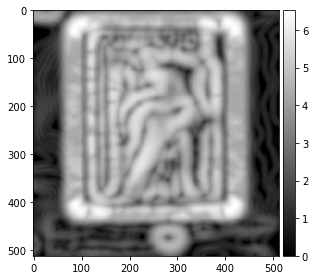

In [4]:

ent = entropy(blurredImg[5],disk(10))
io.imshow(ent,cmap="gray")

In [5]:
entropies = []
for img in tqdm(blurredImg):
    if np.max(img) >1:
        img = img/np.max(img)
    entropies.append(entropy(img,disk(10)))

  0%|                                                  | 0/248 [00:00<?, ?it/s]C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|████████████████████████████████████████| 248/248 [01:16<00:00,  3.26it/s]


In [6]:
integral = []
for img in entropies:
    integral.append(trs.integral_image(img))

In [7]:
Icropped = []
for img in cards:
    Icropped.append(trs.resize(img[30:(img.shape[0]-70),30:(img.shape[1]-30)],(512,512)))

In [402]:
def rangeM(p,m):
    p = int(round(p))
    return max(0,min(p,m-1))
    

def cropping(x):
    image = integral[5]
    i  =rangeM(x[0],image.shape[0])
    j =rangeM(x[1],image.shape[1])
    m = rangeM(x[2],image.shape[0])
    y = rangeM(x[3],image.shape[1])
    l1 = 2
    tempArea =float((m-i)*(y-j))
    totalArea = float((image.shape[0]*image.shape[1]))
    #if(tempArea>400*400):
        #print((image[m,y]-image[i,j])/tempArea)
    if(tempArea>0):
        tempMax = ((image[m,y]-image[i,j])/tempArea) - l1*totalArea/tempArea + l1* tempArea/totalArea
        return -tempMax
    return 0

#interpolation entre les valeurs entiees max and min 

In [403]:
def opt(cropzero):
    answer = scipy.optimize.minimize(cropping,cropzero,method = "Nelder-Mead")
    p=[0,0,0,0]
    p[0] = rangeM(answer.x[0],512)
    p[1] = rangeM(answer.x[1],512)
    p[2] = rangeM(answer.x[2],512)
    p[3] = rangeM(answer.x[3],512)

    return p,(-answer.fun)



In [404]:
tried=[]
bestguess = [0,0,0,0]
bestEnt = 0
for i  in range(100):
    guess = [0,0,0,0]
   
    guess[0]= np.random.choice(range(255))
    guess[1]= np.random.choice(range(255))
    guess[2]= np.random.choice(range(256,511))
    guess[3]= np.random.choice(range(256,511))
    tempguess,tempEnt = opt(guess)
    
    if(tempEnt>bestEnt):
 
        init = guess
        bestEnt = tempEnt
        bestguess = tempguess
    

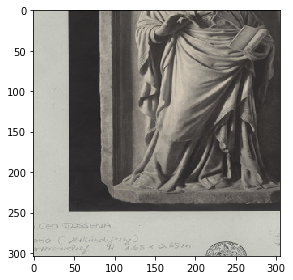

In [405]:
io.imshow(Icropped[5][init[0]:init[2],init[1]:init[3]])

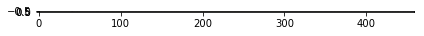

In [406]:
io.imshow(Icropped[5][bestguess[0]:bestguess[2],bestguess[1]:bestguess[3]])

In [407]:
bestEnt

674.79284799256902

609.6372093023256

In [409]:
#for the best crop
best = integral[5][0:440,70:450]
best.shape


(440, 380)

In [414]:
totalArea = 512.0*512
tempArea = 440*380.0
temp =((best[439,379]-best[0,0])/tempArea) +(2 * tempArea/(512*512)) -2* totalArea/tempArea

In [415]:
temp

2.7110465516997797

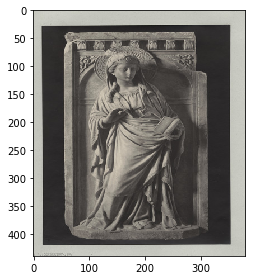

In [416]:
io.imshow(Icropped[5][0:440,70:450])

In [417]:
((integral[5][511,511])/(512*512)) + 2 -2

3.2710834671657452